# Curve fitting for weir discharge coefficient

by Xiaofeng Liu, Ph.D., P.E.  
Associate Professor

Department of Civil and Environmental Engineering  
Institute of Computational and Data Sciences  
Penn State University  
223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

## Introduction

Weirs are probably the most common hydraulic structures for flow control and measurement in open channels. They are either man-made or natural feature that obstructs flow. There are different kinds of weirs, which can be broadly categorized as sharp crested weirs and broad crested weirs. The flow discharge over a weir is related to the upstream hydraulic head. The relationship between weir discharge and head is called the rating curve, which usually comes from fitting of experimental data. 


<img src="broad_crested_weir.png" width="600"/>


The general discharge of the flow over a broad-crested weir can be written as: 
\begin{equation}
   Q=\frac{2}{3}C_dW\sqrt{2g}H^{1.5}
\end{equation}
where $Q$ is the discharge, $W$ is the weir width measured along its crest, and $g$ is gravitational accleration. $H$ is the total head of water above the weir crest, which equals to $V^2/(2g)+h$. Here, $V$ is the incoming flow velocity and $h$ is the upstream water depth above the weir crest. This discharge equation is based on the conservation of energy principle. 

We are interested in the value of discharge coefficient $C_d$ that can be used to estimate the discharge of rivers or design the head of water above the weir crest. Again, this discharge coefficient $C_d$ comes from curve fitting based on experimental data. 

For this problem, the discharge can be converted to the following linear curve fitting:
\begin{equation}
   y = a_1 x + e
\end{equation}
where $y = Q$, $a_1 = \frac{2}{3}C_dW\sqrt{2g}$, and $x= H^{1.5}$. Note that the term involving the power of 1.5 comes from physical laws. Thus,there is no need for power-law curve fitting.

In the following, the Python code performs the linear regression. The measurement data in "Q_H.txt" is from the following reference:
```
Brater, E.F. and King, H.W., 1976. Handbook of hydraulics for the solution of hydraulic engineering problems.
```
In the data file, $W$ is a constant and has a value of 0.5 ft.

Fitted broad crest weir discharge coefficient is  3.32


[]

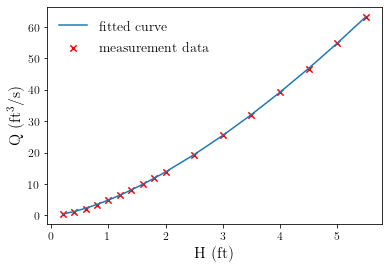

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


#directly load the data from file and assign the columns to "x" and "y"
H, Q = np.loadtxt('Q_H.txt', unpack=True, skiprows=1)
x = H**1.5
y= Q

a0, a1, r2 = calculate_linear_regression_coef(x, y) 

W = 0.5
g = 9.8

cd = a1 *3/2/W/np.sqrt(2*g)
print("Fitted broad crest weir discharge coefficient is ", round(cd,2))

Q_pre = 2/3*cd*W*np.sqrt(2*g)*H**1.5

plt.scatter(H, Q, c = "r", marker = "x", s = 40, label='measurement data') 
plt.plot(H, Q_pre, label='fitted curve') 

plt.xlabel('H (ft)',fontsize=16) 
plt.ylabel('Q (ft$^3$/s)',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.plot()